In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compton import ComptonScattering, AdvancePhoton

def plot_turb(ax, x, y, ndens, Vx, Vy, Vz, width=2):
    ax.pcolormesh(x, y, ndens, cmap="inferno")
    ax.streamplot(
        x,
        y,
        Vx,
        Vy,
        color="w",
        density=2,
        linewidth=(Vx**2 + Vy**2 + Vz**2) / np.max(Vx**2 + Vy**2 + Vz**2) * width,
        arrowsize=1,
        arrowstyle="->",
    )

    ax.set(
        aspect=1,
        xlim=(x.min(), x.max()),
        ylim=(y.min(), y.max()),
    )

In [2]:
data = np.load("turb2d-256.npz")

In [3]:
xmin, xmax, ymin, ymax = -2500, 2500, -2500, 2500

x, y = data["x"], data["y"]
ndens = data["ndens"]

Vx, Vy, Vz = data["Vx"], data["Vy"], data["Vz"]

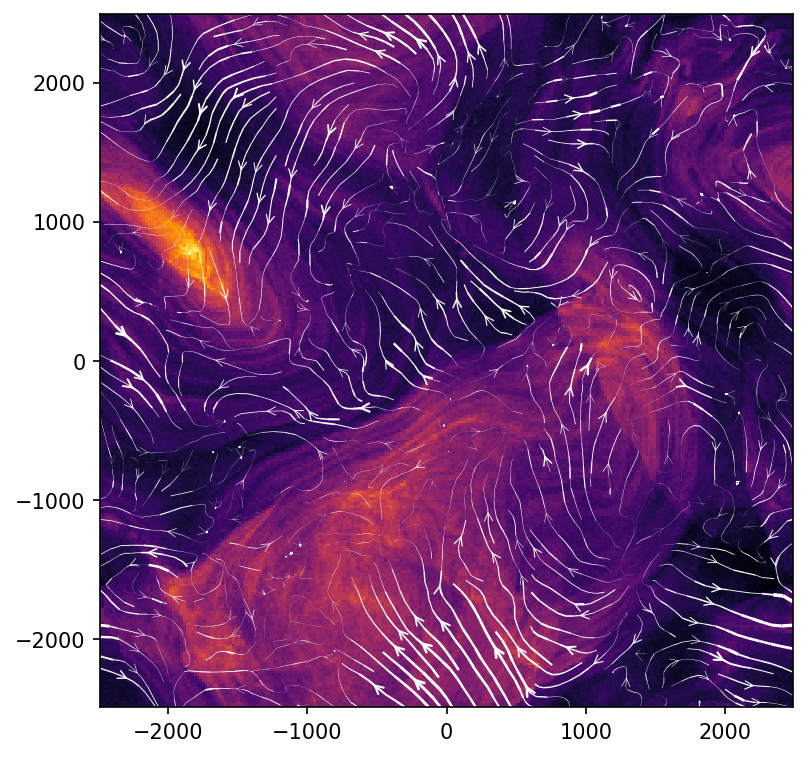

In [4]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

plot_turb(ax, x, y, ndens, Vx, Vy, Vz)

Photon momentum ($c=1$, speed of light is equal to $1$):

$\bm{P} = (E/c) \hat{\bm{k}}$,

where $E$ is photon's energy, and $\hat{\bm{k}}$ is a unit vector (direction of motion).

$|\bm{P}| = E/c$ -- length of the vector $\bm{P}$.

$\bm{P} / |\bm{P}| = \hat{\bm{k}}$

$\bm{x}_{\rm new} = \bm{x}_{\rm old} + \bm{k} c \Delta t$

In [46]:
sy, sx = ndens.shape

photon_pos = [np.array([0, 0, 0])]
photon_mom = np.array([0.2, 1, 2, 0])

photon_mom[1:] = photon_mom[1:] / np.linalg.norm(photon_mom[1:]) * photon_mom[0]

photon_pos_array, photon_mom_array = AdvancePhoton(
    np.array([0, 0, 0]),
    photon_mom,
    2,
    5000,
    2000,
    Vx,
    Vy,
    Vz,
    xmin,
    xmax,
    ymin,
    ymax,
    sx,
    sy,
    True,
)

scatter
scatter


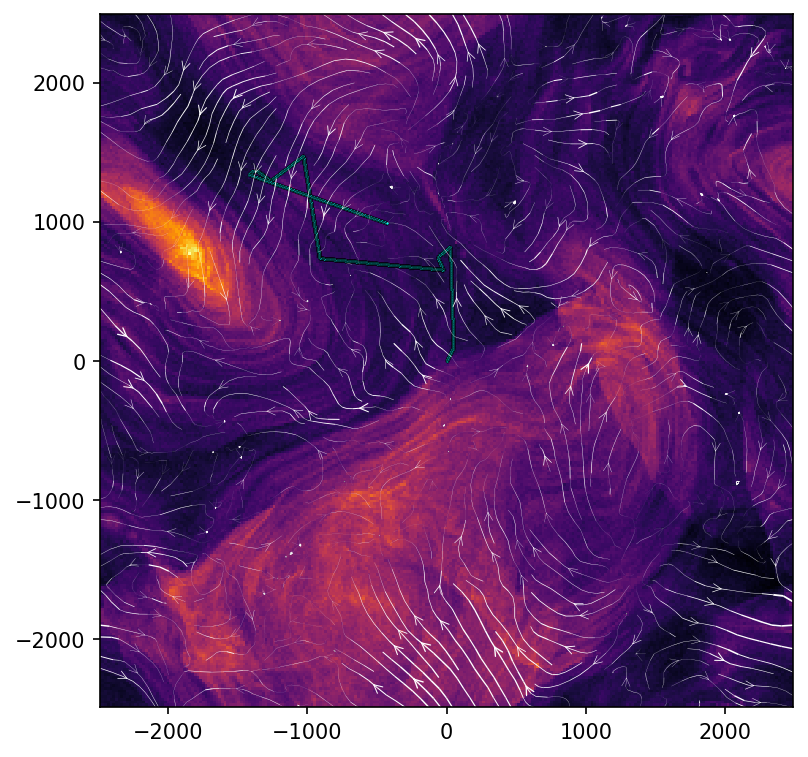

In [34]:
interval = 1

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

plot_turb(ax, x, y, ndens, Vx, Vy, Vz, width=1)

ax.scatter(
    photon_pos_array[:, 0][::interval],
    photon_pos_array[:, 1][::interval],
    color="cyan",
    s=2,
    edgecolor="k",
    lw=0.25,
)

Question:

What's the maximum timestep `dt` we can pick to still physically make sense???

Task:

~~1. Wrap the algorithm into a function which accepts a list of photon momenta, and runs the simulation for each, returning the final momentum of each of the input photons.~~

2. Run the simulation for a series of random photons.

Task for Hayk:
1. ... scaling with density.